In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-08-12,76.0,141.0,495.0,14.0,27.0,0.0,7663.0,201.0,231.0,194.0,...,1039.0,8.0,907.0,1150.0,17.0,309.0,0.0,10.0,226.0,75.0
2020-08-13,79.0,154.0,488.0,4.0,53.0,0.0,7498.0,229.0,384.0,155.0,...,1148.0,16.0,669.0,1281.0,28.0,307.0,0.0,6.0,162.0,97.0
2020-08-14,7.0,146.0,477.0,8.0,37.0,1.0,6365.0,276.0,293.0,282.0,...,1461.0,12.0,498.0,1012.0,19.0,343.0,0.0,11.0,358.0,82.0
2020-08-15,120.0,143.0,469.0,0.0,27.0,0.0,6663.0,196.0,252.0,303.0,...,1042.0,13.0,707.0,1226.0,21.0,319.0,0.0,0.0,165.0,104.0
2020-08-16,45.0,120.0,450.0,0.0,27.0,0.0,5469.0,168.0,271.0,191.0,...,1111.0,6.0,801.0,1148.0,13.0,381.0,0.0,11.0,157.0,85.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(10)

Country/Region
India           57711.0
US              42048.0
Brazil          23101.0
Colombia        11643.0
Peru             9507.0
Argentina        5469.0
Russia           4911.0
Mexico           4448.0
Iraq             4348.0
South Africa     3692.0
Name: 2020-08-16 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

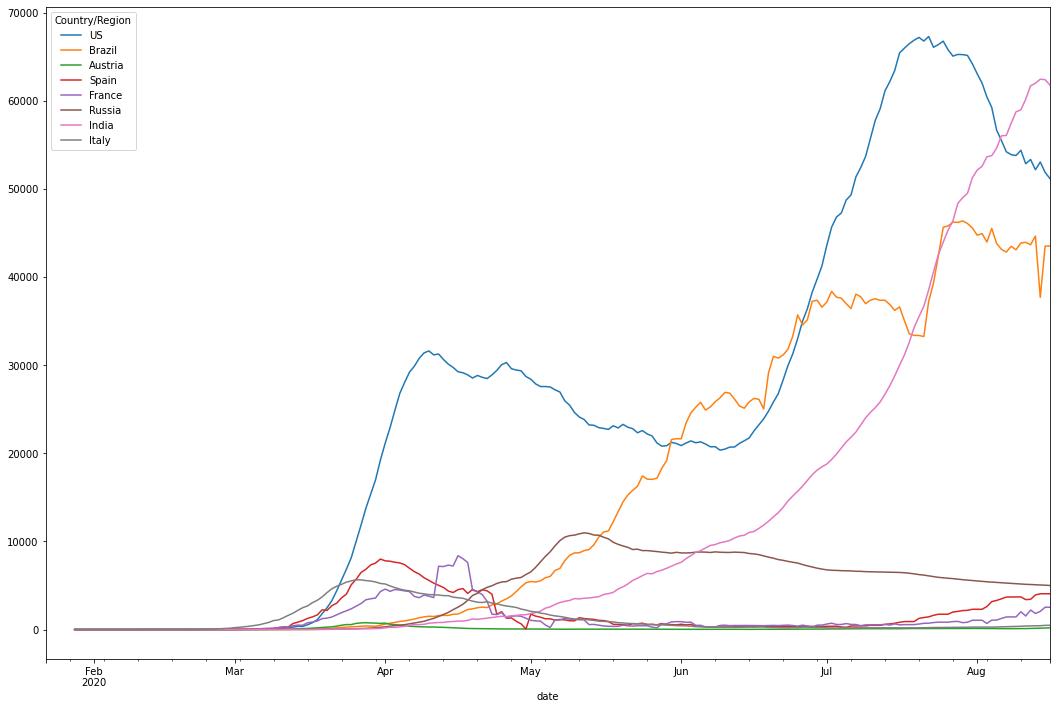

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

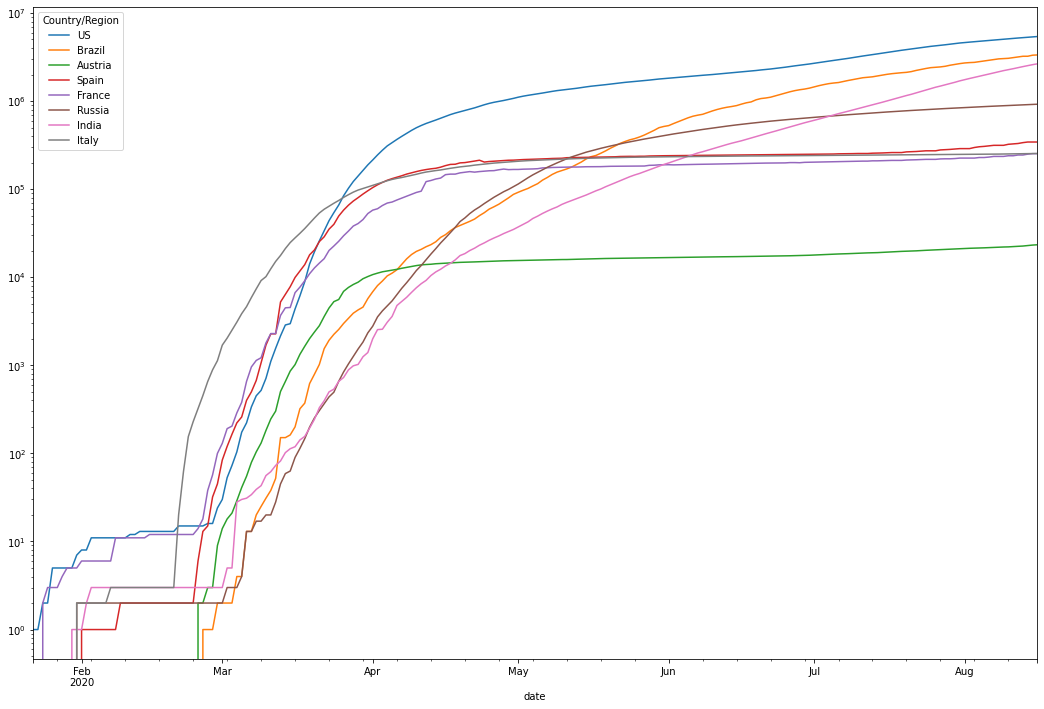

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-08-12,1354,208,1333,53,80,3,5213,806,361,724,...,46791,37,211,247,18,105,1,528,246,122
2020-08-13,1363,213,1341,53,80,3,5362,809,375,725,...,46791,37,216,259,21,106,1,528,246,128
2020-08-14,1363,219,1351,53,86,3,5527,814,379,725,...,46791,38,220,266,22,106,1,528,256,128
2020-08-15,1370,225,1360,53,86,3,5637,817,396,728,...,46791,38,225,276,24,108,1,528,260,130
2020-08-16,1375,228,1370,53,88,3,5703,818,421,728,...,46791,38,232,281,24,110,1,530,260,132


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_deaths.tail().iloc[-1].nlargest(10)

Country/Region
US                170052
Brazil            107852
Mexico             56757
India              50921
United Kingdom     46791
Italy              35396
France             30410
Spain              28617
Peru               26075
Iran               19639
Name: 2020-08-16 00:00:00, dtype: int64

In [10]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-08-12,1507.0,1175.0,1.0,-2.0,47.0,128.0,942.0,10.0
2020-08-13,1076.0,1262.0,1.0,26.0,17.0,122.0,1007.0,6.0
2020-08-14,1342.0,27.0,0.0,12.0,18.0,114.0,996.0,3.0
2020-08-15,1029.0,1742.0,3.0,0.0,0.0,118.0,944.0,158.0
2020-08-16,571.0,620.0,0.0,0.0,0.0,68.0,941.0,4.0


### New Deaths (moving average, 7 days)

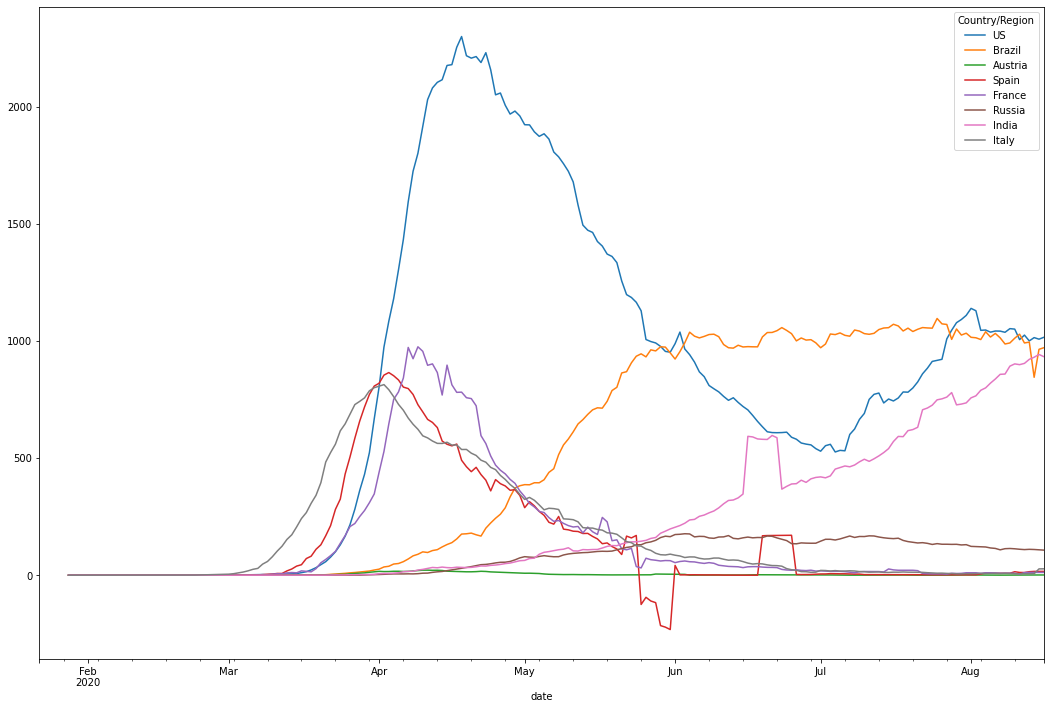

In [11]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

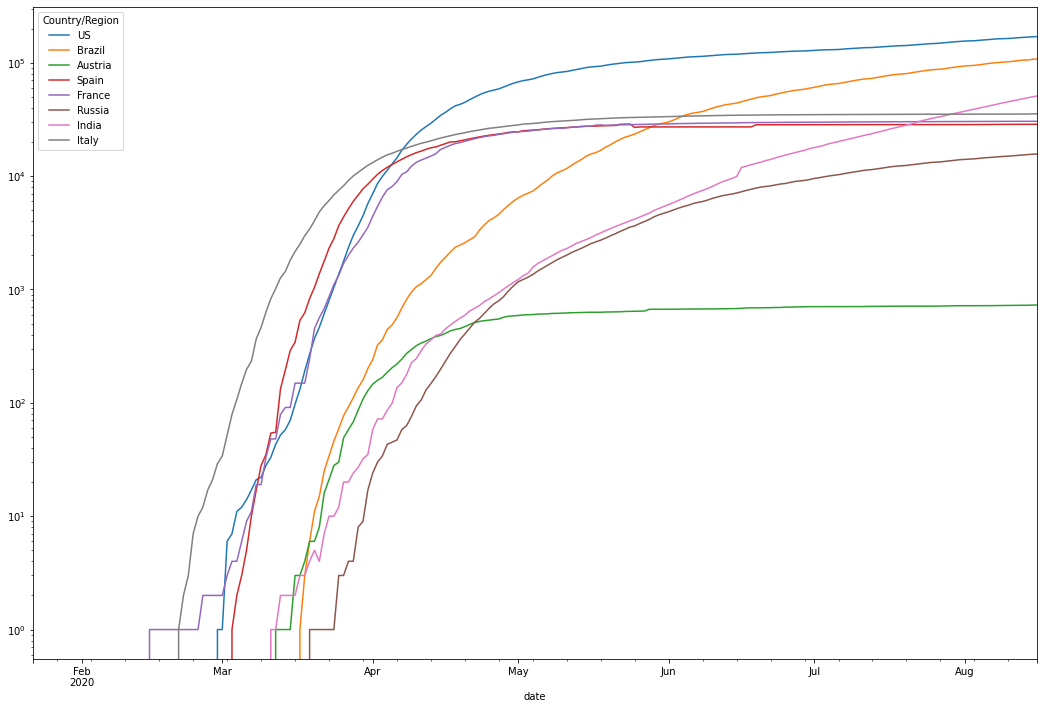

In [12]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [13]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2020-08-12,38800.0,56890.0,145.0,0.0,638.0,7104.0,56383.0,236.0
2020-08-13,20888.0,14872.0,78.0,0.0,3.0,6034.0,55573.0,226.0
2020-08-14,21678.0,95881.0,153.0,0.0,381.0,6539.0,57381.0,403.0
2020-08-15,22201.0,5897.0,128.0,0.0,0.0,6422.0,53322.0,314.0
2020-08-16,14540.0,32139.0,54.0,0.0,0.0,3549.0,57584.0,146.0


### New Recovered (moving average, 7 days)

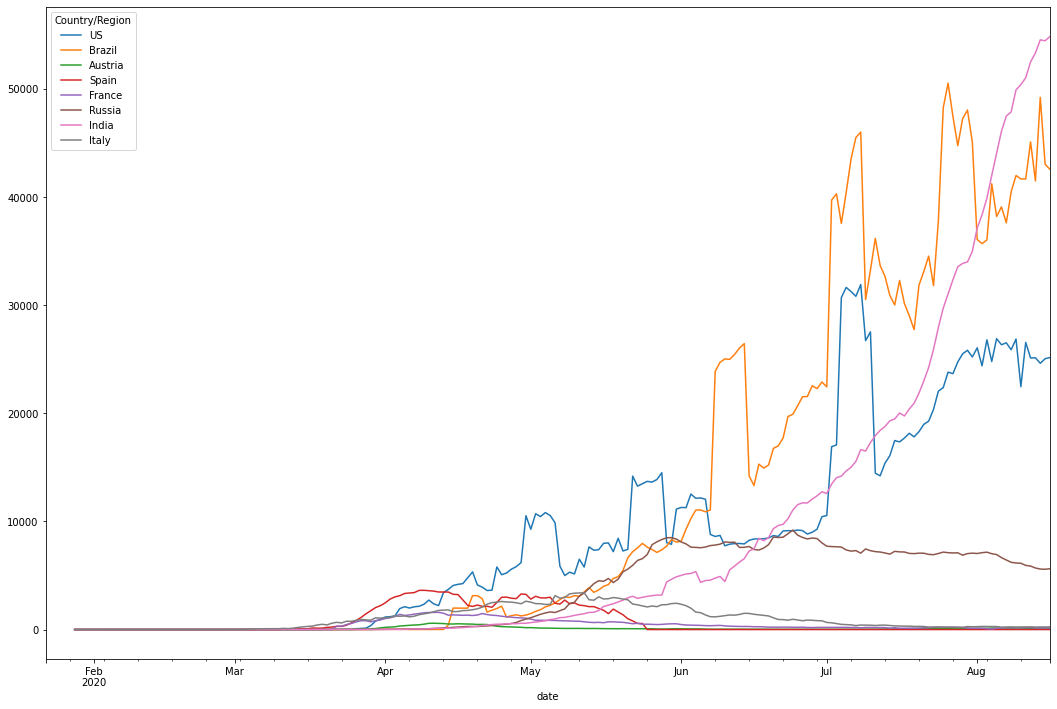

In [15]:
df_daily_recovered[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [16]:
df_recovered.loc["2020-02-23","Italy"] = 1

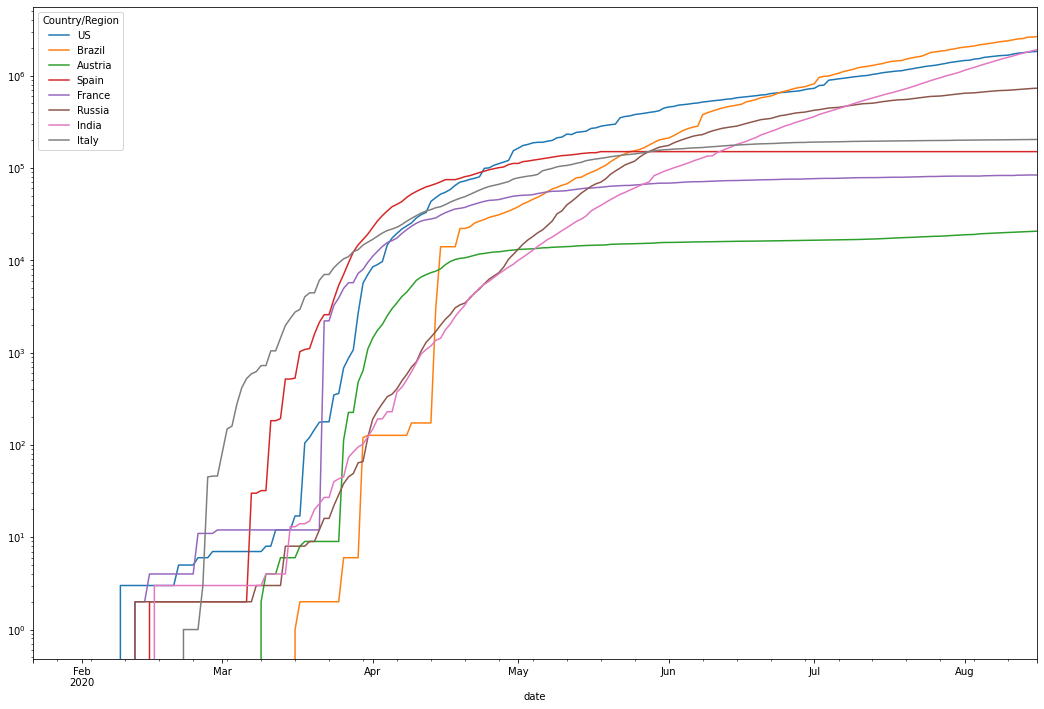

In [17]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [18]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [19]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [20]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [21]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [22]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [23]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [24]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [25]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [26]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [27]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [28]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [29]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [30]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

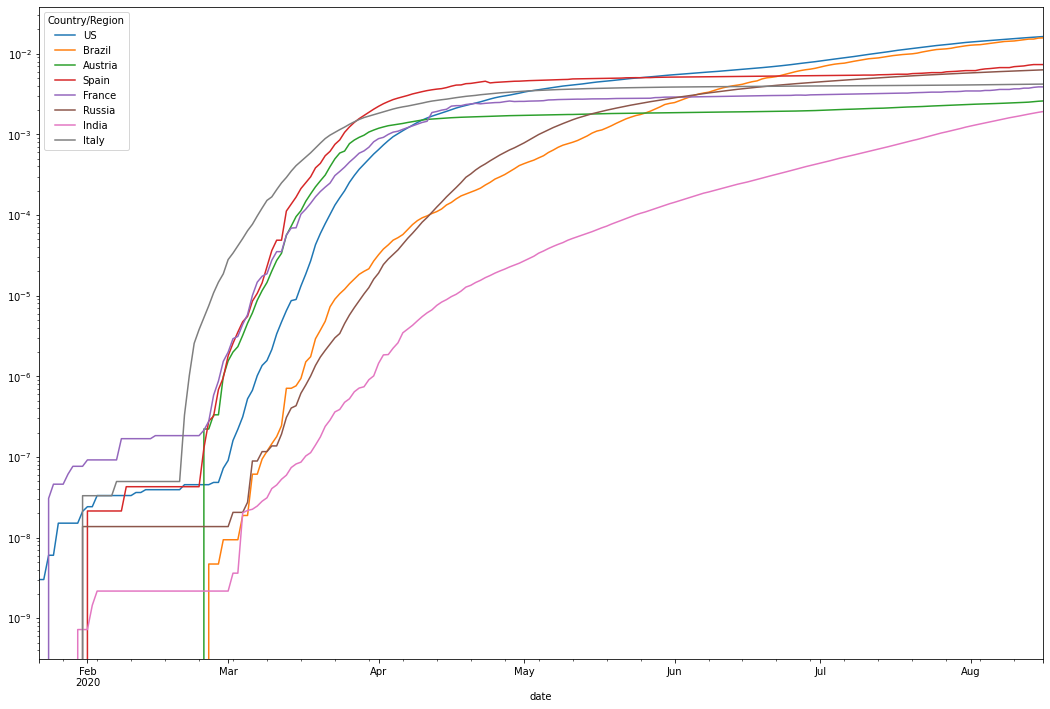

In [31]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

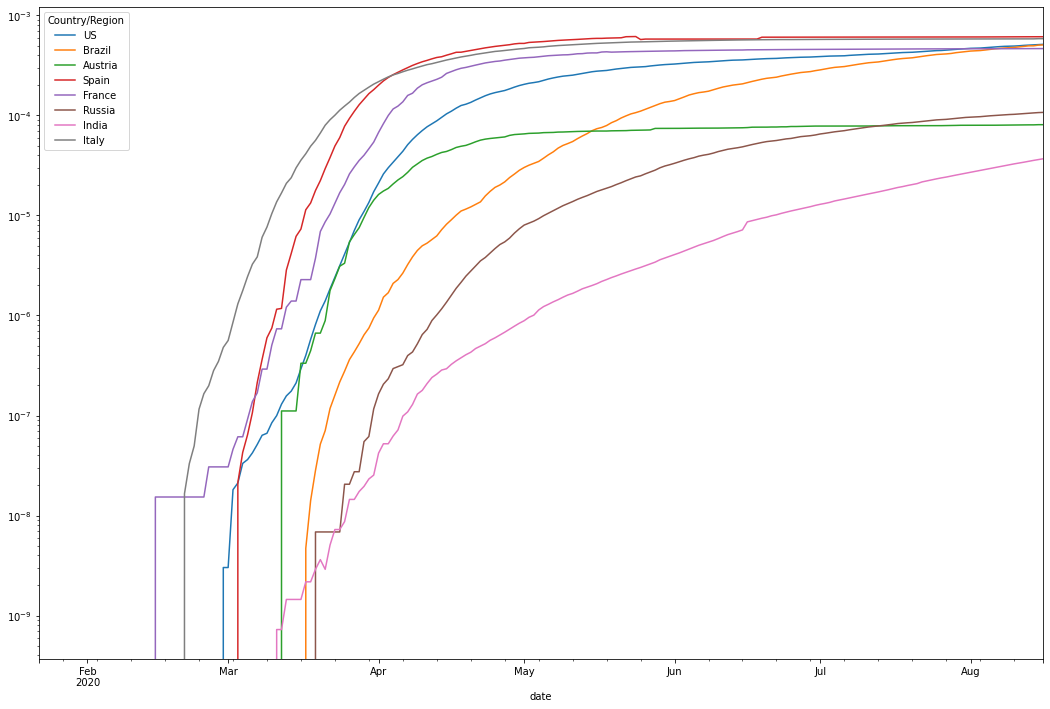

In [32]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

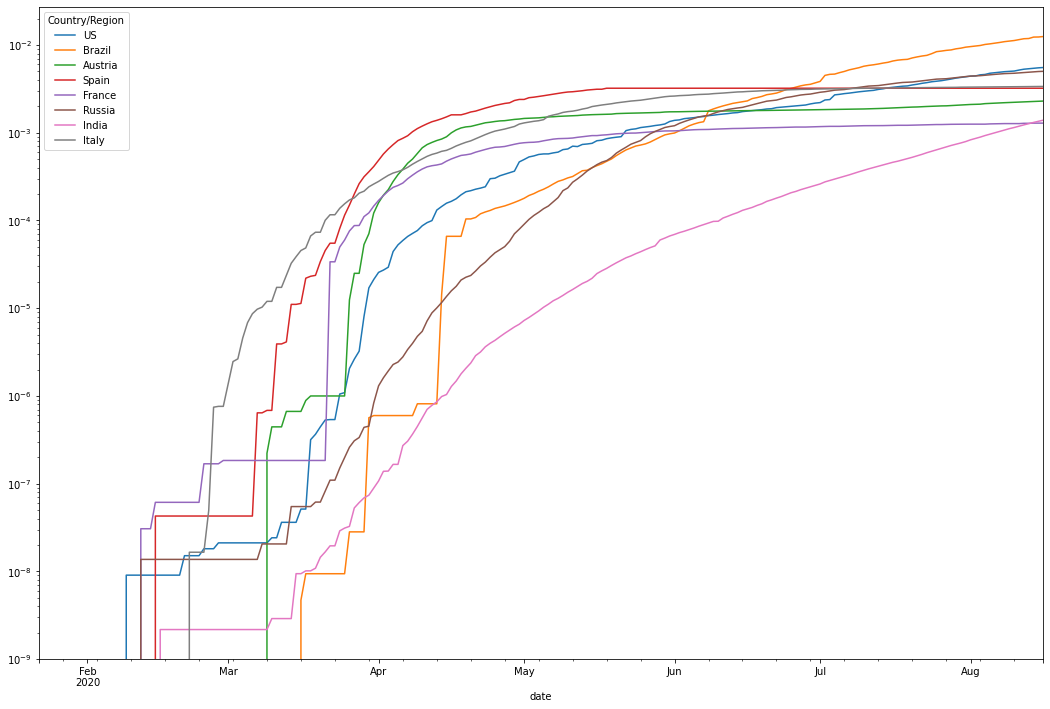

In [33]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()